In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel("D:\Educational\Projects\Parkinsons Disease Prediction\Datasets\Cleaned Data.xlsx")
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
2,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,...,0.02337,0.00607,24.886,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756,1
3,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,...,0.02487,0.00344,26.892,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755,1
4,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,...,0.03218,0.01070,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,170.368,268.796,79.543,0.00571,0.00003,0.00232,0.00269,0.00696,0.03273,0.281,...,0.05139,0.02485,18.540,0.677131,0.685057,-4.796845,0.397749,2.963799,0.277227,0
111,198.458,219.290,148.691,0.00376,0.00002,0.00182,0.00215,0.00546,0.03527,0.297,...,0.06165,0.01728,18.702,0.606273,0.661735,-5.585259,0.310746,2.465528,0.209863,0
112,202.805,231.508,86.232,0.00370,0.00002,0.00189,0.00211,0.00568,0.01997,0.180,...,0.03350,0.02010,18.687,0.536102,0.632631,-5.898673,0.213353,2.470746,0.189032,0
113,202.544,241.350,164.168,0.00254,0.00001,0.00100,0.00133,0.00301,0.02662,0.228,...,0.04426,0.01049,20.680,0.497480,0.630409,-6.132663,0.220617,2.576563,0.159777,0


## Feature Engineering

In [3]:
x = df.drop(['status'], axis= 1)
x

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
2,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,...,0.01351,0.02337,0.00607,24.886,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
3,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,...,0.01256,0.02487,0.00344,26.892,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
4,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,...,0.01717,0.03218,0.01070,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,170.368,268.796,79.543,0.00571,0.00003,0.00232,0.00269,0.00696,0.03273,0.281,...,0.02824,0.05139,0.02485,18.540,0.677131,0.685057,-4.796845,0.397749,2.963799,0.277227
111,198.458,219.290,148.691,0.00376,0.00002,0.00182,0.00215,0.00546,0.03527,0.297,...,0.02530,0.06165,0.01728,18.702,0.606273,0.661735,-5.585259,0.310746,2.465528,0.209863
112,202.805,231.508,86.232,0.00370,0.00002,0.00189,0.00211,0.00568,0.01997,0.180,...,0.01506,0.03350,0.02010,18.687,0.536102,0.632631,-5.898673,0.213353,2.470746,0.189032
113,202.544,241.350,164.168,0.00254,0.00001,0.00100,0.00133,0.00301,0.02662,0.228,...,0.02006,0.04426,0.01049,20.680,0.497480,0.630409,-6.132663,0.220617,2.576563,0.159777


In [4]:
y = df['status']
y

0      1
1      1
2      1
3      1
4      1
      ..
110    0
111    0
112    0
113    0
114    0
Name: status, Length: 115, dtype: int64

## Feature Importance

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x, y)

ExtraTreesClassifier()

In [6]:
print(etc.feature_importances_)

[0.05607434 0.05970345 0.04430582 0.04980982 0.0426504  0.03890021
 0.04584818 0.0384533  0.04096365 0.04811255 0.04607812 0.04215252
 0.04463709 0.04310057 0.04356374 0.0429685  0.04222946 0.06058995
 0.05127296 0.03778069 0.03432514 0.04647953]


<Axes: >

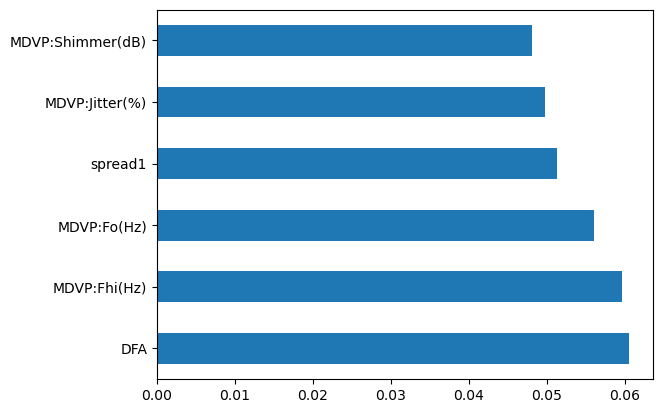

In [7]:
feat_impt = pd.Series(etc.feature_importances_, index=x.columns)
feat_impt.nlargest(6).plot(kind='barh')

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)
x

array([[-0.79772277, -0.37395072, -0.96096995, ...,  0.57834611,
         0.00644899,  1.26493053],
       [-0.8851769 , -0.79699363, -0.03022773, ...,  1.48552411,
         0.3233816 ,  2.42680774],
       [-0.79047009, -0.81064439,  0.05816578, ...,  0.46036537,
        -1.35324217,  0.26045329],
       ...,
       [ 1.38633605,  1.24162861, -0.67344792, ..., -0.13394917,
         0.52183586, -0.0526656 ],
       [ 1.3794526 ,  1.45590417,  1.32106186, ..., -0.03656144,
         0.84395875, -0.45577654],
       [ 1.92846727,  1.94624293, -0.63746608, ...,  1.63422005,
         1.64759319,  0.55126363]])

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [10]:
x_train.shape

(92, 22)

In [11]:
x_test.shape

(23, 22)

In [12]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(penalty='l2', solver='liblinear', max_iter = 800, C = 0.9,)
Lr.fit(x_train, y_train)

y_pred = Lr.predict(x)
print(y_pred)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("\nAccuracy score: ", accuracy_score(y, y_pred))
print("\nConfusion matrix: \n", confusion_matrix(y, y_pred))
print("\nClassification report: \n", classification_report(y, y_pred))

[1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0
 1 0 1 1]

Accuracy score:  0.7652173913043478

Confusion matrix: 
 [[13 17]
 [10 75]]

Classification report: 
               precision    recall  f1-score   support

           0       0.57      0.43      0.49        30
           1       0.82      0.88      0.85        85

    accuracy                           0.77       115
   macro avg       0.69      0.66      0.67       115
weighted avg       0.75      0.77      0.75       115



e:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


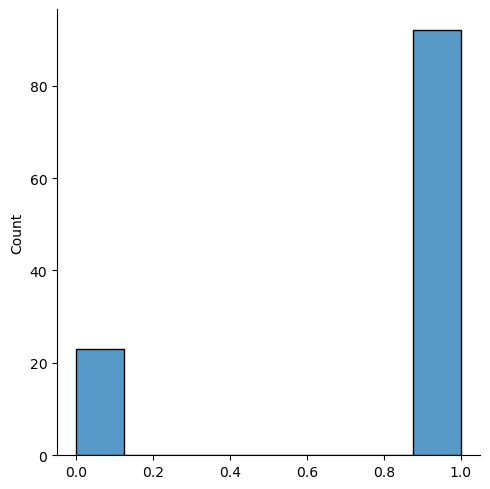

In [13]:
sns.displot(data=y_pred)

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(splitter= 'random', min_samples_split=10, criterion='entropy', max_features=700)
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x)
print(y_pred)

print("\nAccuracy score: ", accuracy_score(y, y_pred))
print("\nConfusion matrix: \n", confusion_matrix(y, y_pred))
print("\nClassification report: \n", classification_report(y, y_pred))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 1]

Accuracy score:  0.9130434782608695

Confusion matrix: 
 [[21  9]
 [ 1 84]]

Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.70      0.81        30
           1       0.90      0.99      0.94        85

    accuracy                           0.91       115
   macro avg       0.93      0.84      0.88       115
weighted avg       0.92      0.91      0.91       115



e:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

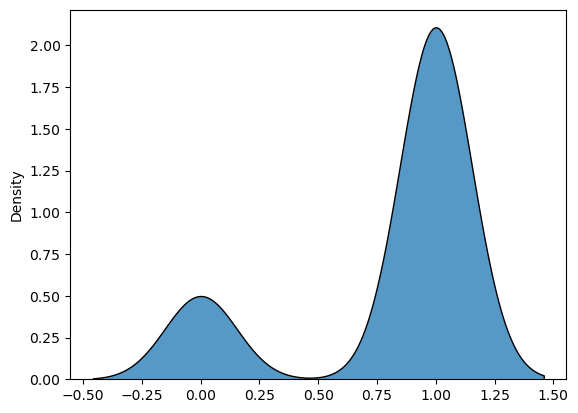

In [15]:
sns.kdeplot(data=y_pred,fill=True, multiple="stack")

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [17]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [18]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [19]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv =10, verbose=3, random_state=42, n_jobs = 20)

In [20]:
rf_random.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


e:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "e:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "e:\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "e:\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_p

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=20,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=3)

In [21]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [22]:
rf_random.best_score_

-0.22666666666666666

In [23]:
y_pred=rf_random.predict(x)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0], dtype=int64)

In [24]:
print("Accuracy score: ", accuracy_score(y, y_pred))
print("Confusion matrix: \n", confusion_matrix(y, y_pred))
print("Classification report: \n", classification_report(y, y_pred))

Accuracy score:  0.9826086956521739
Confusion matrix: 
 [[29  1]
 [ 1 84]]
Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.99      0.99      0.99        85

    accuracy                           0.98       115
   macro avg       0.98      0.98      0.98       115
weighted avg       0.98      0.98      0.98       115



In [25]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

MSE: 0.017391304347826087
RMSE: 0.1318760946791574


<Axes: >

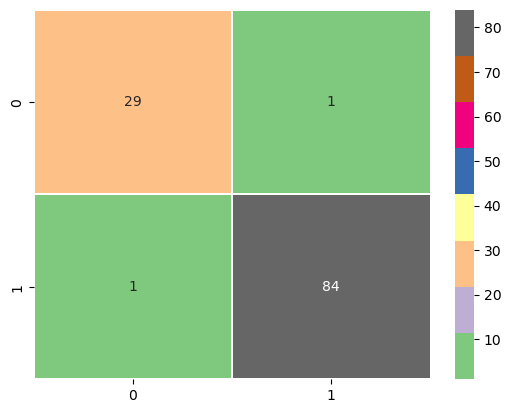

In [26]:
sns.heatmap(data=confusion_matrix(y, y_pred), cmap ='Accent', linewidths = 0.30, annot = True)

In [27]:
import pickle
file = open('ParkinsonsDiseaseModel.pkl', 'wb')
pickle.dump(rf_random, file)